In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
path = os.getcwd()+'/Desktop/USC/s2/DSO562/project1/'

In [4]:
data = pd.read_csv(path+'data_v3_forPCA.csv')

In [8]:
data = data.iloc[:,1:]

In [10]:
data_t = data.T

In [11]:
cov_mat = np.cov(data_t)

In [13]:
cov_mat.shape

(45, 45)

In [14]:
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [15]:
eigen_vals

array([ 1.18236976e+01,  9.06488129e+00,  6.66539981e+00,  5.77904904e+00,
        3.77372726e+00,  2.07679367e+00,  1.59044468e+00,  8.49338436e-01,
        7.48779668e-01,  6.95249656e-01,  6.02639292e-01,  4.88480053e-01,
        2.87197752e-01,  1.59700590e-01,  9.46092124e-02,  6.66633631e-02,
        5.59466210e-02,  4.16922058e-02,  4.11559365e-02,  3.32304004e-02,
        2.34352580e-02,  1.62396129e-02,  9.30810026e-03,  5.67158442e-03,
        3.52171130e-03,  1.63260400e-03,  7.27668110e-04,  3.95123230e-04,
        2.44811781e-04,  8.96655249e-05,  2.32938173e-05,  2.42955672e-05,
        3.99895564e-06,  3.13505451e-06,  9.90738408e-07,  8.45623669e-07,
        6.60383367e-07,  1.01061347e-07,  2.45066661e-08,  4.47359845e-11,
        9.51211985e-15, -7.49117871e-15, -3.59959453e-15,  1.03937546e-15,
        4.00540713e-15])

In [17]:
eigen_vecs

array([[-1.79849666e-01, -1.79077380e-02, -4.67666634e-02, ...,
         1.08173397e-14,  1.62661686e-14,  8.68482214e-15],
       [-1.27849842e-02,  2.50742601e-02,  1.57671602e-01, ...,
         7.83554485e-14,  3.39478052e-14, -4.05846132e-14],
       [ 7.06493535e-02,  2.54285035e-02,  1.78047426e-01, ...,
        -5.13513527e-14, -3.36500666e-14,  2.85198784e-14],
       ...,
       [ 4.06758038e-03, -3.29777914e-01,  5.24849244e-03, ...,
         1.32030009e-09,  4.71310781e-09, -1.59601214e-08],
       [ 4.09163184e-03, -3.30355010e-01,  5.20719417e-03, ...,
         1.52346970e-08,  6.72359221e-08, -2.52561882e-07],
       [ 4.08692702e-03, -3.27234989e-01,  5.05190509e-03, ...,
        -4.06446557e-09, -1.61046755e-08,  5.55061899e-08]])

In [18]:
eigen_vecs.shape

(45, 45)

In [19]:
import matplotlib.pyplot as plt

In [20]:
tot = sum(eigen_vals)
var_explained = [(i/tot) for i in sorted(eigen_vals,reverse = True)]
cum_var_explained = np.cumsum(var_explained)

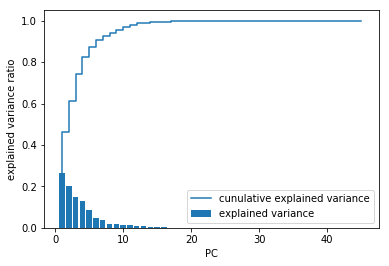

In [26]:
plt.bar(range(1,46),var_explained,label = 'explained variance')
plt.step(range(1,46),cum_var_explained,label = 'cunulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('PC')
plt.legend(loc='best')
plt.show()

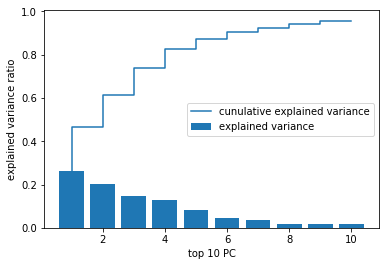

In [30]:
plt.bar(range(1,11),var_explained[:10],label = 'explained variance')
plt.step(range(1,11),cum_var_explained[:10],label = 'cunulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('top 10 PC')
plt.legend(loc='best')
plt.show()

In [35]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [36]:
eigen_pairs.sort(reverse = True)

In [45]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis],
              eigen_pairs[2][1][:,np.newaxis],
              eigen_pairs[3][1][:,np.newaxis],
              eigen_pairs[4][1][:,np.newaxis],
              eigen_pairs[5][1][:,np.newaxis],
              eigen_pairs[6][1][:,np.newaxis],
              eigen_pairs[7][1][:,np.newaxis],
              eigen_pairs[8][1][:,np.newaxis],
              eigen_pairs[9][1][:,np.newaxis]))

In [48]:
w.shape #w is the projection matrix

(45, 10)

In [49]:
data_pca = data.dot(w)

In [50]:
data_pca

,0,1,2,3,4,5,6,7,8,9
0,1.843671,-0.282595,-1.526464,0.658715,0.408708,-1.508330,0.017859,-0.854488,-0.070930,0.219346
1,2.821386,-0.171525,-0.760807,0.540012,0.244024,1.082071,-0.742929,0.533236,0.126557,-0.059273
2,0.530436,0.223873,-0.054932,0.897608,4.568520,-0.534166,1.554958,-0.856839,0.593765,1.487371
3,-0.808517,0.880687,7.321889,-0.488665,7.488479,2.487562,1.466470,-1.926587,1.599867,1.254525
4,-9.559798,48.440824,3.290873,6.075000,6.654299,0.320679,-1.735520,-2.732186,-1.158503,-0.764386
5,0.522051,-0.287272,3.815417,0.321365,-1.118628,-0.381701,-0.319469,0.868990,0.025730,0.044157
6,-0.796250,0.312870,2.115101,-7.106799,-3.238089,0.878517,1.033377,0.326334,-0.144989,0.104706
7,1.805802,-0.278650,-1.497381,0.647827,0.491556,-1.570053,0.000137,-0.719714,-0.137469,0.207005
8,0.748879,-0.316988,3.695169,0.386693,-1.539079,-0.166291,-0.301208,0.494890,-0.104630,-0.026812
9,1.689218,-0.265432,-1.364818,0.581195,0.866098,-1.978515,0.012594,-0.074648,-0.360193,0.149709


In [51]:
data_pca.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,-1.005959e-14,1.043027e-13,-1.838188e-14,1.608827e-14,-2.454040e-15,1.068534e-14,-1.842319e-14,2.307876e-15,-8.492469e-15,6.275890e-15
std,3.438560e+00,3.010794e+00,2.581744e+00,2.403965e+00,1.942608e+00,1.441108e+00,1.261128e+00,9.215956e-01,8.653206e-01,8.338163e-01
min,-4.908322e+01,-7.427287e-01,-7.095904e+00,-1.360451e+02,-7.389758e+00,-1.037770e+02,-1.373920e+02,-2.533932e+01,-3.201074e+02,-1.207998e+02
25%,2.725020e-01,-3.133076e-01,-1.656481e+00,3.441450e-01,-1.132701e+00,-1.335322e+00,-4.657582e-01,-4.902573e-01,-4.302094e-01,-7.356215e-02
50%,1.467809e+00,-2.654319e-01,-8.730689e-01,5.630269e-01,-5.083687e-03,-1.082718e-02,-5.973865e-02,3.811035e-02,-7.749815e-02,5.718754e-02
75%,1.805802e+00,-1.677181e-01,2.098543e+00,8.008231e-01,7.130761e-01,1.032979e+00,1.563124e-01,5.340021e-01,2.824285e-01,2.420408e-01
max,2.685020e+01,6.301699e+01,2.959146e+02,8.773668e+00,6.255446e+02,2.147769e+01,1.151117e+01,2.998904e+02,5.237319e+01,7.849261e+01


In [52]:
data_pca.to_csv(path+'data_pca.csv')